## In this notebook, I will demonstrate the following:

<li> How to create an sqlite3 database in Python using Jupyter Notebook
<li> Read CSV data into a DataFrame
<li> Save data from DataFrame into a table in the created db.
<li> Use SQL commands to manipulate and display data in the db. All in a Juypyter notebook.
    

## Import essential libraries and read csv data into a Dataframe

In [1]:
import sqlite3
import pandas as pd

df=pd.read_csv('employee_data.csv')


## Create an sqlite3 database , let's name it mytable.db

In [2]:
conn=sqlite3.connect('mytable.db')

## Save Dataframe as a table in the newly created database. We name the table 'employee'

In [5]:
df.to_sql(name="employee",con=conn,if_exists='replace',index=False)

1470

In [6]:
conn.commit()

## We're now going to use magic functions to connect to an external sql database

In [16]:
%%capture
%load_ext sql
%sql sqlite:///mytable.db

## Let's preview how our table looks like. 

In [29]:
%%sql

select *
from employee
LIMIT 5


 * sqlite:///mytable.db
Done.


Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## We are now able to use SQL queries to answer any questions from the data that was loaded into the database we just created. All of this from our notebook.

### Quesion 1: What education fields are included in the data

In [30]:
%%sql

select distinct(EducationField)
from employee

 * sqlite:///mytable.db
Done.


EducationField
Life Sciences
Other
Medical
Marketing
Technical Degree
Human Resources


### Question 2: Plot the avg age of employees by education

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [53]:
dataf=pd.read_sql( '''

select avg(Age) as Avg_Age, EducationField
from employee
Group by EducationField
Order by Avg_Age

''',conn)

In [55]:
dataf.head()

,Avg_Age,EducationField
0,35.365854,Other
1,36.121212,Technical Degree
2,36.838362,Medical
3,37.037037,Human Resources
4,37.107261,Life Sciences


<AxesSubplot:xlabel='Avg_Age', ylabel='EducationField'>

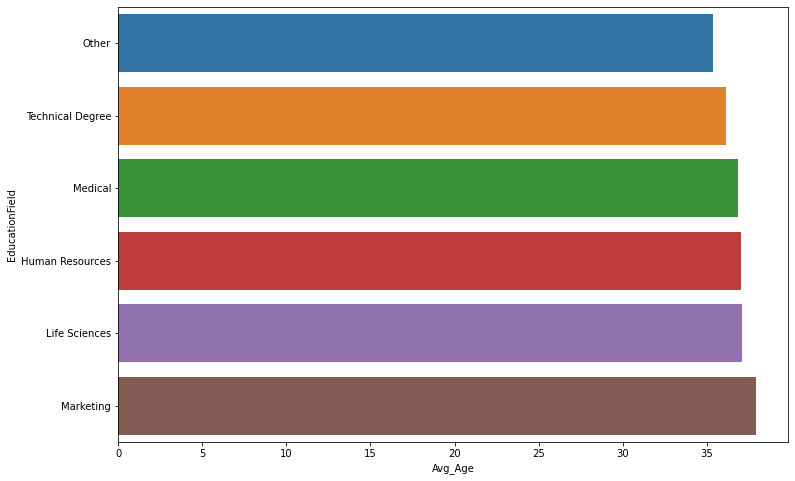

In [109]:
plt.figure(figsize=(12,8))
sns.barplot(x=dataf['Avg_Age'], y=dataf['EducationField'])

### Question 3: Which gender/sex saw the highest attrition

In [71]:
%%sql

select count(*) as Attrition, Gender
from employee
Where Attrition = 'Yes'
Group by Gender


 * sqlite:///mytable.db
Done.


Attrition,Gender
87,Female
150,Male


### Question 4: Is distance from home a factor influencing attrition

In [81]:

dataf1=pd.read_sql( '''

select DistanceFromHome, HourlyRate, Attrition, MaritalStatus
from employee

''',conn)

dataf1.head(10)

,DistanceFromHome,HourlyRate,Attrition,MaritalStatus
0,1,94,Yes,Single
1,8,61,No,Married
2,2,92,Yes,Single
3,3,56,No,Married
4,2,40,No,Married
5,2,79,No,Single
6,3,81,No,Married
7,24,67,No,Divorced
8,23,44,No,Single
9,27,94,No,Married


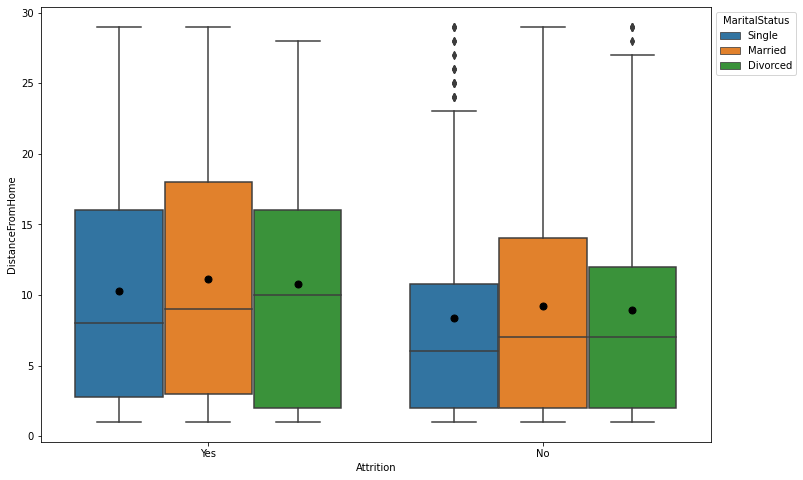

In [106]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Attrition', y='DistanceFromHome',data=dataf1, hue='MaritalStatus',showmeans=True ,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"7"})

sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))

## By using jupyter notebooks to interact and manipulate data within a database allows us to combine the power of python, along with libraries like seaborn for effective data handling and visualization.